Prediction where swing states are test sample

#### Libraries

In [2]:
import pandas as pd


### Data Loading

#### Raking States 2024 data

In [7]:
file_path = "/Users/ali/Desktop/MASTER/AML/project/us-2024-election-prediction/data/rank-states-2024.txt" 
df = pd.read_csv(file_path, delimiter=",")

In [8]:
columns_to_transform = ['RANK', 'HEALTH CARE', 'EDUCATION', 'ECONOMY', 
                         'INFRASTRUCTURE', 'OPPORTUNITY', 'FISCAL STABILITY', 
                         'CRIME & CORRECTIONS', 'NATURAL ENVIRONMENT']

min_rank = 1
max_rank = 50

for column in columns_to_transform:
    max_value = df[column].max()
    min_value = df[column].min()
    df[column] = (((max_value - df[column]) / (max_value - min_value)) * 100).round(2)


In [9]:
df

,RANK,STATE,HEALTH CARE,EDUCATION,ECONOMY,INFRASTRUCTURE,OPPORTUNITY,FISCAL STABILITY,CRIME & CORRECTIONS,NATURAL ENVIRONMENT
0,100.00,Utah,73.47,97.96,95.92,95.92,65.31,89.80,83.67,8.16
1,97.96,New Hampshire,75.51,83.67,87.76,57.14,81.63,24.49,100.00,85.71
2,95.92,Nebraska,51.02,73.47,63.27,93.88,63.27,95.92,67.35,83.67
3,93.88,Minnesota,69.39,67.35,48.98,83.67,77.55,87.76,57.14,97.96
4,91.84,Idaho,65.31,65.31,97.96,71.43,73.47,83.67,77.55,42.86
5,89.80,Iowa,59.18,79.59,28.57,81.63,95.92,77.55,73.47,71.43
6,87.76,Vermont,67.35,53.06,61.22,79.59,100.00,30.61,95.92,81.63
7,85.71,Washington,81.63,75.51,73.47,87.76,26.53,73.47,22.45,79.59
8,83.67,Florida,48.98,100.00,100.00,61.22,10.20,61.22,75.51,75.51
9,81.63,Massachusetts,97.96,95.92,85.71,22.45,8.16,22.45,93.88,87.76


In [10]:
swing_states=["Ohio","Arizona", "Georgia", "Michigan", "Nevada", "North Carolina", "Pennsylvania", "Wisconsin"]

#### Presindential elections history data

In [17]:
file_path2 = "/Users/ali/Desktop/MASTER/AML/project/us-2024-election-prediction/data/1976-2020-president.csv"  # Adjust the path to your file
df2 = pd.read_csv(file_path2)

##### Preprocess

In [18]:
def capitalize_first_letter(cell):
    if isinstance(cell, str):  
        return cell.capitalize()
    return cell 

In [23]:
## capitalizet the first letter in the state
df2["state"] = df2["state"].apply(capitalize_first_letter)

## select winner per state and year
#df2 = df2.loc[df2.groupby(['year', 'state'])['candidatevotes'].idxmax()]
##select democrat and republican
df2 = df2[df2['party_detailed'].isin(['DEMOCRAT', 'REPUBLICAN'])]

## select the swing states data 
df2_swing_states= df2[df2['state'].isin(swing_states)]

In [24]:
df2


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,Alabama,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,Alabama,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
7,1976,Alaska,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,Alaska,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
11,1976,Arizona,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,2020,West virginia,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN
4267,2020,Wisconsin,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT
4268,2020,Wisconsin,WI,55,35,25,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1610184,3298041,20210113,NaN,REPUBLICAN
4280,2020,Wyoming,WY,56,83,68,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,73491,278503,20210113,NaN,DEMOCRAT


In [47]:
df2['vote_share'] = df2['candidatevotes'] / df2['totalvotes']
df2['party_votes_year'] = df2['party_detailed'] + '_votes_' + df2['year'].astype(str)
pivoted = df2.pivot_table(index='state', columns='party_votes_year', values='vote_share', aggfunc='sum')
pivoted = pivoted.reset_index()
print(pivoted)

party_votes_year                 state  DEMOCRAT_votes_1976  \
0                              Alabama             0.557273   
1                               Alaska             0.356531   
2                              Arizona             0.398000   
3                             Arkansas             0.649617   
4                           California             0.479548   
5                             Colorado             0.426099   
6                          Connecticut             0.467337   
7                             Delaware             0.519691   
8                 District of columbia             0.816312   
9                              Florida             0.519261   
10                             Georgia             0.669383   
11                              Hawaii             0.505920   
12                               Idaho             0.371185   
13                            Illinois             0.481076   
14                             Indiana             0.45

/var/folders/7s/byhf_72x0gbg7s7mbc_wxtj40000gn/T/ipykernel_84893/2026786434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vote_share'] = df2['candidatevotes'] / df2['totalvotes']
/var/folders/7s/byhf_72x0gbg7s7mbc_wxtj40000gn/T/ipykernel_84893/2026786434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['party_votes_year'] = df2['party_detailed'] + '_votes_' + df2['year'].astype(str)


In [27]:
pivoted.to_csv('party_vote_share_by_state_and_year.csv', index=False)

In [48]:
import matplotlib.pyplot as plt
pivoted.set_index('state', inplace=True)
state_selected = 'Alabama'
state_data = pivoted.loc[state_selected]



In [49]:
state_data

party_votes_year
DEMOCRAT_votes_1976      0.557273
DEMOCRAT_votes_1980      0.474489
DEMOCRAT_votes_1984      0.382808
DEMOCRAT_votes_1988      0.398633
DEMOCRAT_votes_1992      0.408801
DEMOCRAT_votes_1996      0.431561
DEMOCRAT_votes_2000      0.415665
DEMOCRAT_votes_2004      0.368444
DEMOCRAT_votes_2008      0.387404
DEMOCRAT_votes_2012      0.383590
DEMOCRAT_votes_2016      0.343579
DEMOCRAT_votes_2020      0.365700
REPUBLICAN_votes_1976    0.426149
REPUBLICAN_votes_1980    0.487501
REPUBLICAN_votes_1984    0.605425
REPUBLICAN_votes_1988    0.591650
REPUBLICAN_votes_1992    0.476454
REPUBLICAN_votes_1996    0.501218
REPUBLICAN_votes_2000    0.564838
REPUBLICAN_votes_2004    0.624607
REPUBLICAN_votes_2008    0.603169
REPUBLICAN_votes_2012    0.605458
REPUBLICAN_votes_2016    0.620831
REPUBLICAN_votes_2020    0.620316
Name: Alabama, dtype: float64

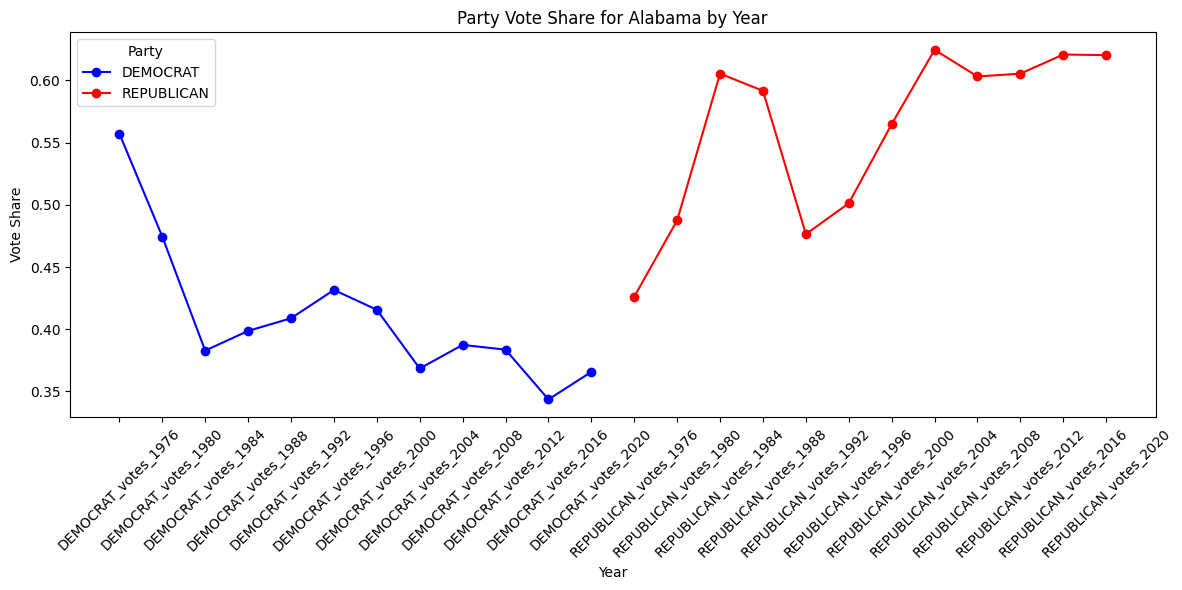

In [50]:
democrat_columns = [col for col in state_data.index if 'DEMOCRAT' in col]
republican_columns = [col for col in state_data.index if 'REPUBLICAN' in col]

# Plotting the time series for both DEMOCRAT and REPUBLICAN
plt.figure(figsize=(12, 6))

# Plot DEMOCRAT party time series
plt.plot(democrat_columns, state_data[democrat_columns], label='DEMOCRAT', color='blue', marker='o')

# Plot REPUBLICAN party time series
plt.plot(republican_columns, state_data[republican_columns], label='REPUBLICAN', color='red', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Vote Share')
plt.title(f'Party Vote Share for {state_selected} by Year')

# Add legend
plt.legend(title='Party')

# Rotate x-ticks to make year labels readable
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/7s/byhf_72x0gbg7s7mbc_wxtj40000gn/T/ipykernel_84893/548879122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vote_share'] = df2['candidatevotes'] / df2['totalvotes']


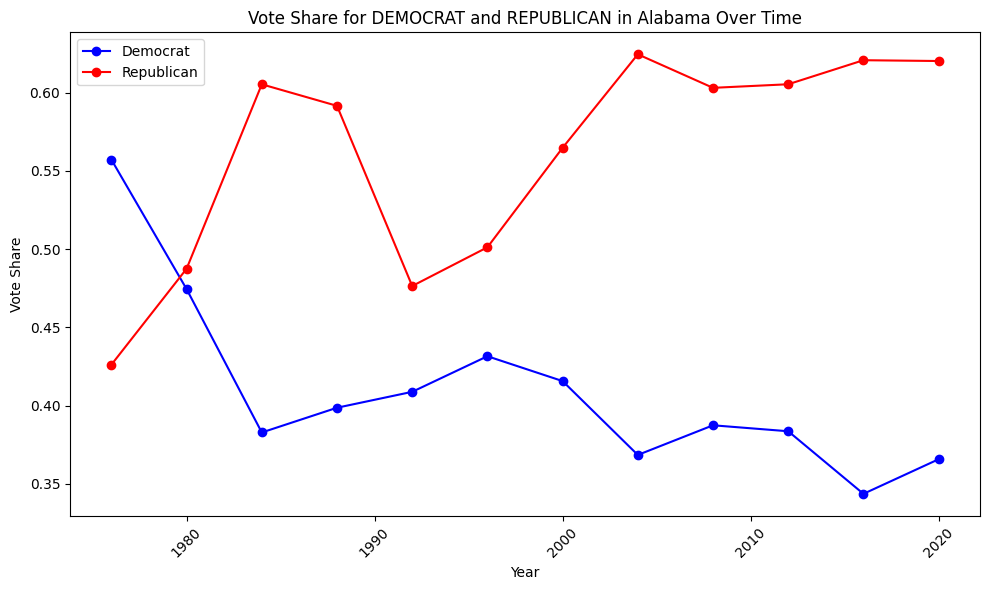

In [52]:
import matplotlib.pyplot as plt

# Assuming df2 is your dataset (replace this with your actual dataset)
# df2 = pd.read_csv('your_file.csv')

# Calculate vote share for each row
df2['vote_share'] = df2['candidatevotes'] / df2['totalvotes']

# User-defined variable for filtering (can change the state as needed)
state_selected = 'Alabama'  # Replace with your state of interest

# Filter the DataFrame for the selected state and both parties (Democrat and Republican)
filtered_data = df2[(df2['state'] == state_selected) & (df2['party_detailed'].isin(['DEMOCRAT', 'REPUBLICAN']))]

# Create a pivot table for easier plotting: Years as columns and party vote share as rows
pivoted = filtered_data.pivot_table(index='year', columns='party_detailed', values='vote_share', aggfunc='mean')

# Plotting the time series for both parties in the selected state
plt.figure(figsize=(10, 6))

# Plot Democrat vote share
plt.plot(pivoted.index, pivoted['DEMOCRAT'], marker='o', label='Democrat', color='blue')

# Plot Republican vote share
plt.plot(pivoted.index, pivoted['REPUBLICAN'], marker='o', label='Republican', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Vote Share')
plt.title(f'Vote Share for DEMOCRAT and REPUBLICAN in {state_selected} Over Time')

# Add legend
plt.legend()

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
